In [161]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
### 1. Link notebook with google drive and access data from your personal Gdrive


### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/drive/MyDrive/Dataset/"
model_loc = "/content/drive/MyDrive/Dataset/"
os.makedirs(model_loc, exist_ok=True)

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

['heart.csv', 'heart_disease_best_model.hdf5']


In [164]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [165]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [166]:
data.shape
#This dataset has 303 rows and 14 columns

(303, 14)

In [167]:
data.isnull().sum()
#There is no Missing Value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [168]:
print(data['oldpeak'].unique())

[2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.  0.5 1.6 1.2 0.2 1.8 1.  2.6 1.5 3.  2.4
 0.1 1.9 4.2 1.1 2.  0.7 0.3 0.9 3.6 3.1 3.2 2.5 2.2 2.8 3.4 6.2 4.  5.6
 2.9 2.1 3.8 4.4]


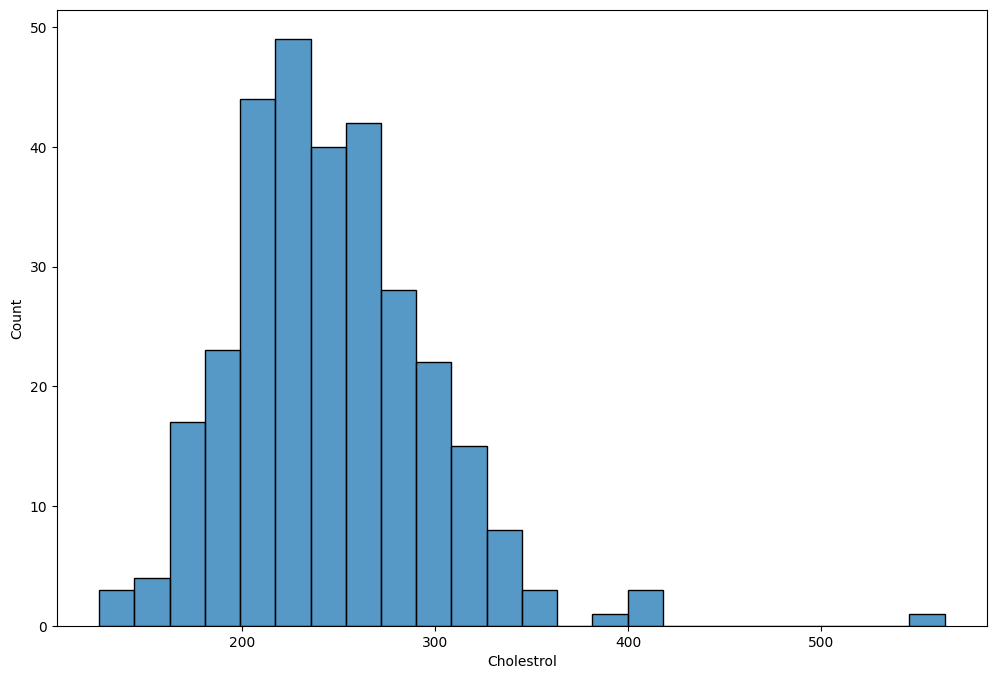

In [169]:
# Histogram visualization for cholestrol
plt.figure(figsize = (12, 8))
sns.histplot(x ='chol', data = data)
plt.xlabel('Cholestrol')
plt.show()

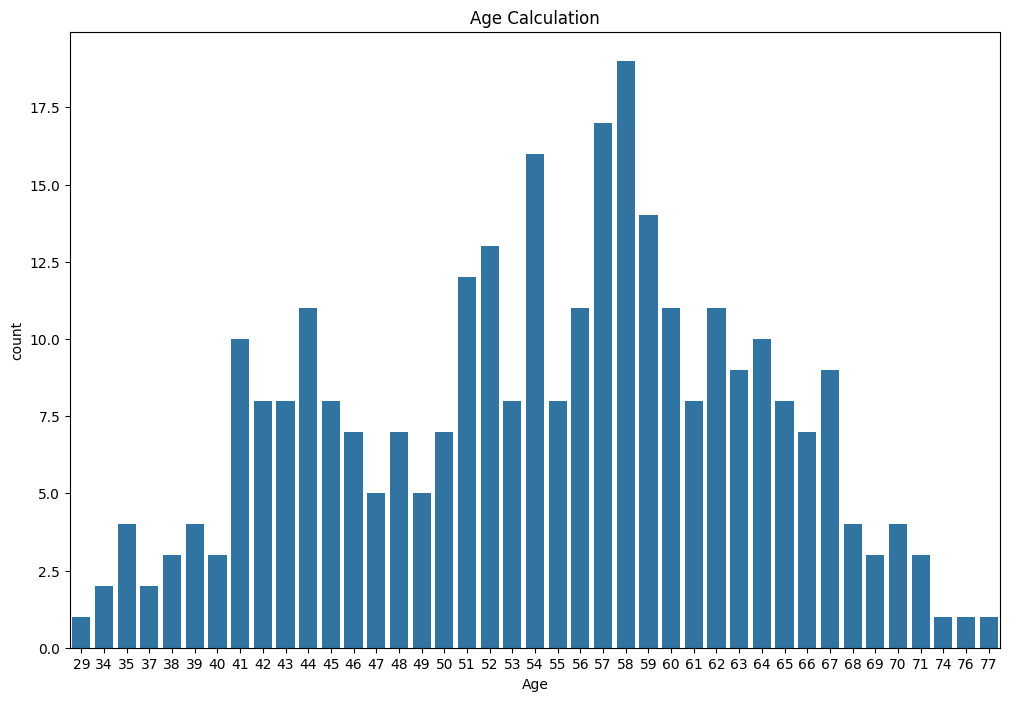

In [170]:
# Histogram visualization for cholestrol
plt.figure(figsize = (12, 8))
sns.countplot(x ='age', data = data)
plt.xlabel('Age')
plt.title('Age Calculation')
plt.show()

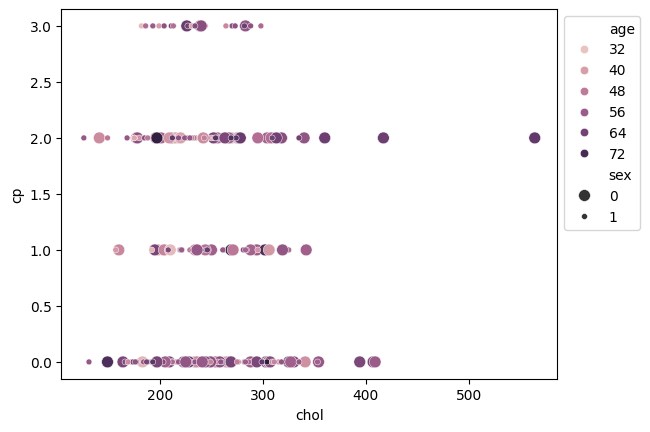

In [171]:
sns.scatterplot(x = "chol", y = "cp", data = data, hue = 'age', size = "sex")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [172]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

#The purpose of this code is to convert specific columns in a dataset, identified as categorical variables and listed in `catagorialList`,
#into the 'object' data type using the `astype()` function. This conversion is commonly done to ensure that these columns are treated as
#categorical variables rather than numerical ones, which can be important for certain analyses and modeling tasks.

In [173]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data)

<ipython-input-173-6655fa5ec9ce>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-173-6655fa5ec9ce>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-173-6655fa5ec9ce>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-173-6655fa5ec9ce>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-173-6655fa5ec9ce>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed 

In [174]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

# Line 3: Extracts the target variable from the dataset and converts it into a NumPy array
# Line 4: Reshapes the target array to ensure it has a specific shape required for further processing.
# Line 5: Creates the feature matrix by removing the target column from the dataset along the columns.

In [175]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

data = pd.DataFrame({
    'data1': [30, 75, 59, 63, 97],
    'data2': [130, 287, 162, 925, 718]
})

print("Original Dataset:")
print(data)

# Normalization
normalized_data = (data - data.min()) / (data.max() - data.min())

print("\nNormalized Dataset:")
print(normalized_data)


Original Dataset:
   data1  data2
0     30    130
1     75    287
2     59    162
3     63    925
4     97    718

Normalized Dataset:
      data1     data2
0  0.000000  0.000000
1  0.671642  0.197484
2  0.432836  0.040252
3  0.492537  1.000000
4  1.000000  0.739623


In [176]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

# The data has now fall within the range 0 to 1 after implementing min-max normalization on the dataset
# This normalization process ensures that each feature's values are scaled proportionally based on their original minimum and maximum values
# This scaling facilitates better comparison and interpretation of the data across different features

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [177]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(169, 28)
(43, 28)
(91, 28)


In [178]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=28, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

# First Layer (Dense, 64 neurons, softmax activation): This layer calculates probabilities for each class using the softmax function, useful for multi-class classification tasks.
# Second Layer (Dense, 32 neurons, softmax activation): Further refines the probabilities generated by the previous layer, aiding in distinguishing between different classes.
# Third Layer (Dense, 1 neuron, sigmoid activation): Produces a probability value between 0 and 1, indicating the likelihood of the binary outcome, typical for binary classification tasks.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1856      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# Loss Function (Mean Squared Error - MSE): Measures the average squared difference between predicted and actual values, guiding the model to minimize prediction errors during training.
# Optimizer (Adam with Learning Rate 0.01): Adjusts the model's parameters iteratively based on the gradient of the loss function, with Adam optimizer adapting the learning rate during training to optimize convergence.
# Metrics (Accuracy): Evaluates the proportion of correctly predicted outcomes out of the total number of samples, providing a measure of overall correctness in classification tasks.

In [180]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
11/11 [==============================] - 1s 26ms/step - loss: 0.2497 - acc: 0.5148 - val_loss: 0.2504 - val_acc: 0.4884
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2466 - acc: 0.5562 - val_loss: 0.2494 - val_acc: 0.4884
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.2432 - acc: 0.5562 - val_loss: 0.2468 - val_acc: 0.4884
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2378 - acc: 0.5562 - val_loss: 0.2407 - val_acc: 0.4884
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2296 - acc: 0.5562 - val_loss: 0.2293 - val_acc: 0.4884
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.2174 - acc: 0.7041 - val_loss: 0.2166 - val_acc: 0.7907
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2015 - acc: 0.8521 - val_loss: 0.2004 - val_acc: 0.8605
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0

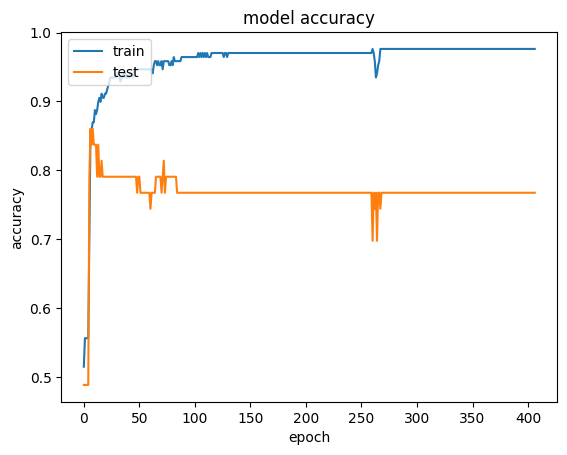

In [181]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

# The plot generated by this code represents the model's accuracy over epochs during training and validation.
# This plot allows visualization of how the model's accuracy changes over time during training, helping to assess its performance
# and identify potential issues such as overfitting or underfitting.

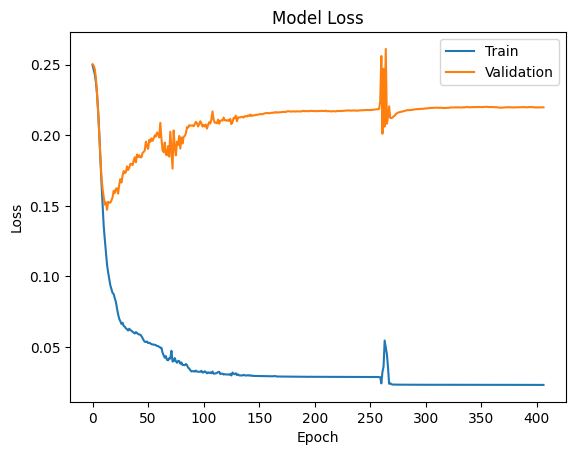

In [182]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])  # Plot training loss
plt.plot(output.history['val_loss'])  # Plot validation loss
plt.title('Model Loss')  # Set title
plt.ylabel('Loss')  # Set ylabel
plt.xlabel('Epoch')  # Set xlabel
plt.legend(['Train', 'Validation'], loc='upper right')  # Add legend
plt.show()  # Display plot

In [183]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

# The purpose of evaluating the model on the test dataset is to assess its performance and generalization
# ability on unseen data, providing insight into its accuracy and ability to generalize to new data.
# This helps to ensure the model's reliability and effectiveness in real-world applications.

3/3 [==============================] - 0s 4ms/step - loss: 0.1409 - acc: 0.8462

acc: 84.62%
loss: 0.14


In [184]:
# Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

3/3 [==============================] - 0s 5ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

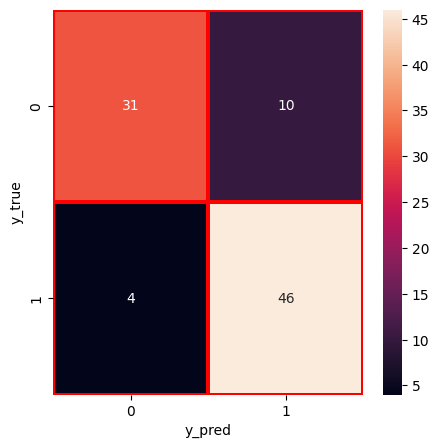


              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



In [185]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# The Confusion Matrix is a performance evaluation tool in machine learning used to visualize the performance of a classification model.
# The Confusion Matrix displays the counts of true positive (TP), false positive (FP), false negative (FN), and true negative (TN) predictions, aiding in understanding the model's performance on each class
# True Positive (TP): The number of correctly predicted positive instances, indicating instances correctly classified as positive by the model.
# False Positive (FP): The number of negative instances incorrectly classified as positive, indicating instances incorrectly labeled as positive by the model.
# False Negative (FN): The number of positive instances incorrectly classified as negative, indicating instances incorrectly labeled as negative by the model.
# True Negative (TN): The number of correctly predicted negative instances, indicating instances correctly classified as negative by the model.

16. The provided classification report outlines the model's performance metrics for a binary classification task. For class 0, the model achieves 85% precision, meaning 85% of instances predicted as class 0 are actually class 0, with a recall of 80%, indicating that it correctly identifies 80% of actual class 0 instances. Similarly, for class 1, the precision and recall are 85% and 88% respectively. The F1-score, which balances precision and recall, is 0.83 for class 0 and 0.86 for class 1. These metrics are based on a dataset of 91 instances, resulting in an overall accuracy of 85%. Additionally, macro and weighted averages provide aggregated measures across both classes, with macro average precision, recall, and F1-score all at 0.85, and weighted average precision, recall, and F1-score all at 0.85, indicating a balanced performance across both classes.

In [186]:
model.save(os.path.join('/content/drive/MyDrive/Dataset/','heart_disease_best_model.hdf5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
